In [2]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [6]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2015-11-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['SPY','AMT','ORCL','PPG','COST','MSFT','UNH','TROW','BLK','NVDA','FB','BABA','CRM','PFE','NFLX','SQ']

# Get 5 years of past data of portfolios
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.index = df_ticker.index.date
df_ticker

AMT                                       BABA           \
              open    high     low   close     volume    open     high   
2015-11-19   99.87  100.26   99.22   99.62  1223026.0   78.06   79.150   
2015-11-20  100.20  100.87   99.53  100.47  1023837.0   78.44   80.785   
2015-11-23  100.49  100.67   99.45   99.93   755145.0   80.45   82.190   
2015-11-24   99.28   99.45   98.32   99.27  1054663.0   80.85   81.110   
2015-11-25   99.15   99.60   98.90   99.07   622603.0   80.91   82.675   
...            ...     ...     ...     ...        ...     ...      ...   
2020-09-25  235.00  240.67  234.97  239.81  2303471.0  267.57  271.810   
2020-09-28  243.07  244.42  238.41  240.26  2028683.0  275.16  278.840   
2020-09-29  241.21  242.00  239.12  240.14  3603311.0  275.43  279.300   
2020-09-30  241.93  243.58  239.69  241.71  4642422.0  284.01  295.000   
2020-10-01  242.19  245.00  239.96  241.98  3682629.0  295.48  295.590   

                                         ...    TROW                      \
                 low    close    volume  ...    open      high       low   
2015-11-19   77.4030   77.910  12089473  ...   76.38   76.4800   76.0100   
2015-11-20   78.4000   79.965  19449298  ...   76.67   76.9100   75.9100   
2015-11-23   79.9700   81.310  16904194  ...   76.42   76.7000   76.0200   
2015-11-24   79.2700   80.790  12496062  ...   75.24   75.7800   74.9701   
2015-11-25   80.8200   81.630  13755605  ...   75.59   76.4200   75.3400   
...              ...      ...       ...  ...     ...       ...       ...   
2020-09-25  264.5600  271.130   8456050  ...  122.94  125.8825  122.6200   
2020-09-28  274.1989  276.010   7712563  ...  127.26  129.0800  126.9150   
2020-09-29  274.9000  276.910  13649225  ...  127.63  129.3650  126.9900   
2020-09-30  283.7100  293.850  45880867  ...  129.10  130.0200  127.1100   
2020-10-01  288.2500  290.020  30334287  ...  128.40  129.2600  127.4500   

                                  UNH                                    
             close     volume    open    high     low   close    volume  
2015-11-19   76.38   521700.0  109.74  113.71  109.61  110.61  13240076  
2015-11-20   76.38   671459.0  111.01  114.44  110.60  113.00   5609101  
2015-11-23   76.15   425575.0  112.97  114.49  112.10  112.15   3006888  
2015-11-24   75.63   593463.0  111.70  113.45  111.06  113.23   2363542  
2015-11-25   76.01   631376.0  113.47  115.05  113.00  114.42   2408146  
...            ...        ...     ...     ...     ...     ...       ...  
2020-09-25  125.25   620267.0  291.22  303.27  291.22  302.32   1574721  
2020-09-28  128.47   671261.0  306.39  310.01  302.83  303.40   1816580  
2020-09-29  127.48   928739.0  303.67  305.50  300.68  304.14   3147925  
2020-09-30  128.24  1102828.0  304.02  314.52  303.99  311.23   4953696  
2020-10-01  128.08   812747.0  312.91  315.17  309.15  313.09   4042761  

[1225 rows x 80 columns]

In [8]:
# Documentation of Monte Carlo Simulation
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [9]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [10]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AMT                                                  BABA  \
              open    high    low   close     volume daily_return   open   
2015-11-19   99.87  100.26  99.22   99.62  1223026.0          NaN  78.06   
2015-11-20  100.20  100.87  99.53  100.47  1023837.0     0.008532  78.44   
2015-11-23  100.49  100.67  99.45   99.93   755145.0    -0.005375  80.45   
2015-11-24   99.28   99.45  98.32   99.27  1054663.0    -0.006605  80.85   
2015-11-25   99.15   99.60  98.90   99.07   622603.0    -0.002015  80.91   

                                    ...     TROW                   \
              high     low   close  ...      low  close    volume   
2015-11-19  79.150  77.403  77.910  ...  76.0100  76.38  521700.0   
2015-11-20  80.785  78.400  79.965  ...  75.9100  76.38  671459.0   
2015-11-23  82.190  79.970  81.310  ...  76.0200  76.15  425575.0   
2015-11-24  81.110  79.270  80.790  ...  74.9701  75.63  593463.0   
2015-11-25  82.675  80.820  81.630  ...  75.3400  76.01  631376.0   

                            UNH                                                 
           daily_return    open    high     low   close    volume daily_return  
2015-11-19          NaN  109.74  113.71  109.61  110.61  13240076          NaN  
2015-11-20     0.000000  111.01  114.44  110.60  113.00   5609101     0.021607  
2015-11-23    -0.003011  112.97  114.49  112.10  112.15   3006888    -0.007522  
2015-11-24    -0.006829  111.70  113.45  111.06  113.23   2363542     0.009630  
2015-11-25     0.005024  113.47  115.05  113.00  114.42   2408146     0.010510  

[5 rows x 96 columns]

In [11]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000275,1.002811,0.999017,1.011722,1.002191,0.993601,0.998864,1.006316,0.998791,0.992642,...,1.018937,1.005700,0.985951,1.003564,0.993603,1.008908,1.002228,1.004697,1.004213,1.002866
2,0.998261,1.011977,1.003721,1.030392,1.009527,0.989222,0.996333,0.999115,0.998948,0.994498,...,1.029407,1.010948,0.981491,1.013231,1.000424,1.014981,1.012428,0.996516,1.012122,1.011982
3,0.993161,1.007866,1.011659,1.030466,1.002245,0.998396,0.990341,1.004233,1.002999,0.999471,...,1.032658,0.999831,0.990803,0.995037,1.014932,1.023304,1.017428,0.996447,1.019638,1.018742
4,0.997173,1.011674,1.008178,1.037699,0.997529,1.006703,0.987986,1.002826,1.022193,0.997707,...,1.023399,0.999057,0.996410,0.997325,1.019243,1.013885,1.008331,0.990041,1.027410,1.000176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.974563,3.311814,3.939435,4.111731,2.787134,2.256723,2.494484,3.487363,4.842014,3.082000,...,3.344448,3.375475,2.980649,2.130323,3.064812,3.761207,4.485346,3.296971,2.002919,2.845664
1257,3.925258,3.345419,3.964262,4.107901,2.782192,2.257395,2.530255,3.451378,4.899342,3.079603,...,3.339047,3.381841,2.951348,2.105338,3.062404,3.736062,4.467303,3.289649,2.007017,2.843724
1258,4.001345,3.333726,3.984500,4.123633,2.817439,2.233703,2.575891,3.462560,4.862226,3.083690,...,3.346181,3.366216,2.956854,2.119700,3.089939,3.745294,4.399717,3.255635,2.009044,2.832509
1259,3.954739,3.307088,3.969906,4.105078,2.828459,2.218415,2.579056,3.488376,4.868259,3.109706,...,3.313363,3.362020,2.986486,2.116633,3.107213,3.733042,4.363542,3.208268,2.031299,2.820515


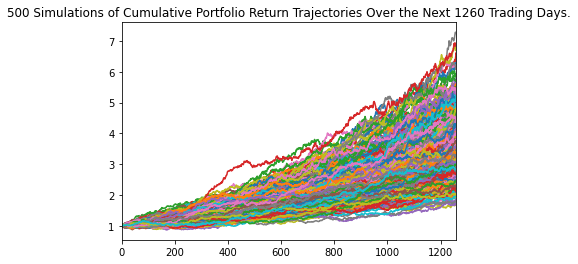

In [13]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MonteCarlo_5yrs_simulation.png", bbox_inches="tight")

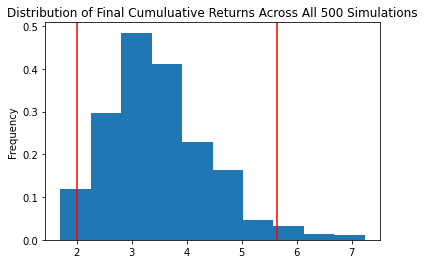

In [14]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MonteCarlo_5yrs_distribution.png',bbox_inches='tight')

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)